#### **Ejercicios de Programacion Lineal** ####
#### **Asignatura:** Programación para Analítica Prescriptiva y de Apoyo a la Decisión ####
#### **Alumno:** Aminadab Córdova Acosta ####

**Problema 1**

La Ápex Televisión debe decidir el número de televisores de 27” y 20” producidos en una de sus fábricas. La investigación de mercado (analítica predictiva) proyecta ventas a lo más de 40 televisores de 27” y 10 de 20”. El número máximo de horas-hombre disponible es de 500 por mes, un televisor de 27” requiere 20 horas-hombre y uno 20” requiere 10 horas-hombre. Cada televisor de 27” produce una ganancia de $120 y cada uno de 20” da una ganancia de $80. Un distribuidor está de acuerdo comprar todos los televisores producidos siempre en cuando no exceda el máximo indicado por el estudio de mercado. ¿Cuántas televisiones debe producir Ápex Televisión de cada tipo para maximizar sus ganancias?

Objetivo: Maximizar la ganancia

Solución:

Con la información proporcionada en el problema, se puede describir la expresión de la función objetivo, así como las restricciones.

$x_1$ = # de televisores de 27" 

$x_2$ = # de televisores de 20"


Modelo matemático

Función objetivo:

Max $120x_1$ + $80x_2$

$s.a$

$x_1$ $<=$ 40  --- (Demanda máxima de televisores de 27")

$x_2$ $<=$ 10  --- (Demanda máxima de televisores de 20")

$20x_1$ + $10x_2$ $<=$ 500   --- (Horas - hombre)

$x_1>=0$, $x_2>=0$       --- (No negatividad)

In [1]:
# Se importa librería requerida
import pyomo.environ as pyo
# Crear el modelo
model = pyo.ConcreteModel()
#Variables de decision
model.x1 = pyo.Var(within=pyo.NonNegativeReals)
model.x2 = pyo.Var(within=pyo.NonNegativeReals)

#Funcion objetivo
model.obj = pyo.Objective(expr = 120*model.x1 + 80*model.x2, sense = pyo.maximize)

# restricciones
model.con1 = pyo.Constraint(expr = model.x1 <= 40)
model.con2 = pyo.Constraint(expr = model.x2 <= 10)
model.con3 = pyo.Constraint(expr = 20*model.x1 + 10*model.x2 <= 500)

# Resolver
solver = pyo.SolverFactory('glpk')
result = solver.solve(model)

# Mostrar resultados
print("Ganancia Maxima:", model.obj())
print(f"Producción óptima de televisores de 27\": {model.x1.value}")
print(f"Producción óptima de televisores de 20\": {model.x2.value}")

solver 'glpk'


ApplicationError: No executable found for solver 'glpk'

**Problema 2**

La compañía Word Light produce dos dispositivos para las lámparas (productos 1 y 2) que requieren partes de metal y componentes eléctricos. La administración desea determinar cuántas unidades de cada producto fabricar para maximizar la ganancia. Por cada unidad del producto 1 se requieren 1 unidad de partes de metal y 2 unidades de componentes eléctricos. Por cada unidad del producto 2 se requieren 3 unidades de partes de metal y 2 unidades de componentes eléctricos. La compañía tiene 200 unidades de partes de metal y 300 de componentes eléctricos. Cada unidad del producto 1 da una ganancia de $1. Las primeras 60 unidades de producto 2 dan una ganancia de $2 por unidad; cualquier exceso de 60 unidades no tiene ganancia por lo que fabricar más de 60 está fuera de consideración.

Objetivo: Maximizar la ganancia

Solución:

Con la información proporcionada en el problema, se puede describir la expresión de la función objetivo, así como las restricciones.

$x_1$ = # de producto 1

$x_2$ = # de producto 2


Modelo matemático

Función objetivo:

Max $x_1$ + $2x_2$

$s.a$

$x_1$ + $3x_2$ $<=$ 200   --- (Unidades de partes de metal)

$2x_1$ + $2x_2$ $<=$ 300   --- (Unidades de componentes electrónicos)

$x_2$ $<=$ 60  --- (Límite unidades producto 2)

$x_1>=0$, $x_2>=0$       --- (No negatividad)

In [ ]:
# Se importa librería requerida
import pyomo.environ as pyo
# Crear el modelo
model = pyo.ConcreteModel()
#Variables de decision
model.x1 = pyo.Var(within=pyo.NonNegativeReals) # Número de unidades del producto 1
#model.x2 = pyo.Var(within=pyo.NonNegativeReals) # Número de unidades del producto 2 
model.x2 = pyo.Var(within=pyo.NonNegativeIntegers, bounds=(0, 60))  # Número de unidades del producto 2 (máximo 60)

#Funcion objetivo
model.obj = pyo.Objective(expr = 1*model.x1 + 2*model.x2, sense = pyo.maximize)

# restricciones
model.con1 = pyo.Constraint(expr = 1*model.x1 + 3*model.x2 <= 200) # Restricción de partes de metal
model.con2 = pyo.Constraint(expr = 2*model.x1 + 2*model.x2 <= 300) # Restricción de componentes eléctricos
#model.con3 = pyo.Constraint(expr = model.x2 <= 60) # restricción unidades de producto 2

# Resolver
solver = pyo.SolverFactory('glpk')
result = solver.solve(model)

# Mostrar resultados
print("Ganancia Maxima:", model.obj())
print(f"Producción óptima del producto 1: {model.x1.value}")
print(f"Producción óptima del producto 2: {model.x2.value}")

Ganancia Maxima: 175.0
Producción óptima del producto 1: 125.0
Producción óptima del producto 2: 25.0


**Problema 3**

La compañía de seguros Primo está en proceso de introducir dos nuevas líneas de productos: seguro de riesgo especial e hipotecas. La ganancia esperada es de $5 por el seguro de riesgo especial y $2 por unidad de hipoteca. La administración desea establecer las cuotas de venta de las nuevas líneas para maximizar la ganancia total. Los requerimientos de trabajo son los siguientes:

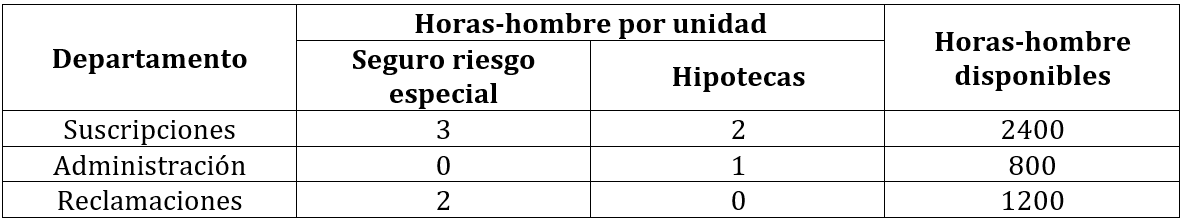

Objetivo: Maximizar la ganancia

Solución:

Con la información proporcionada en el problema, se puede describir la expresión de la función objetivo, así como las restricciones.

$x_1$ = cuota de venta de seguro de riesgo especial

$x_2$ = cuota de venta de hipoteca


Modelo matemático

Función objetivo:

Max $5x_1$ + $2x_2$

$s.a$

$3x_1$ + $2x_2$ $<=$ 2400   --- (Horas-hombre del departamento de Suscripciones)

$x_2$ $<=$ 800   --- (Horas-hombre del departamento de Administración)

$2x_1$ $<=$ 1200   --- (Horas-hombre del departamento de Reclamaciones)


$x_1>=0$, $x_2>=0$       --- (No negatividad)

In [ ]:
# Se importa librería requerida
import pyomo.environ as pyo
# Crear el modelo
model = pyo.ConcreteModel()
#Variables de decision
model.x1 = pyo.Var(within=pyo.NonNegativeReals) # Número de unidades de seguro de riesgo especial
model.x2 = pyo.Var(within=pyo.NonNegativeReals) #  Número de unidades de hipotecas


#Funcion objetivo
model.obj = pyo.Objective(expr = 5*model.x1 + 2*model.x2, sense = pyo.maximize)

# restricciones
model.con1 = pyo.Constraint(expr = 3*model.x1 + 2*model.x2 <= 2400) # Suscripciones
model.con2 = pyo.Constraint(expr = 1*model.x2 <= 800) # Administración
#model.con3 = pyo.Constraint(expr = 2*model.x1 <= 1200) # Reclamaciones
model.con3 = pyo.Constraint(expr = 1*model.x1 <= 600) # Reclamaciones

# Resolver
solver = pyo.SolverFactory('glpk')
result = solver.solve(model)

# Mostrar resultados
print("Ganancia Maxima:", model.obj())
print(f"Producción óptima de seguros de riesgo especial: {model.x1.value}")
print(f"Producción óptima de hipotecas: {model.x2.value}")

Ganancia Maxima: 3600.0
Producción óptima de seguros de riesgo especial: 600.0
Producción óptima de hipotecas: 300.0


**Problema 4**

Weenis and Buns es una planta procesadora de alimentos que fabrica productos para hotdogs. Muelen su propia harina para el pan a una tasa máxima de 200 libras por semana. Cada pan requiere 0.1 libras. Tienen un contrato con Pigland Inc., que especifica la entrega de 800 libras de productos de puerco cada lunes. Cada salchicha requiere ¼ de libra de producto de puerco. Se cuenta con suficiente cantidad del resto de los ingredientes de ambos productos. Por último, la mano de obra consiste en 5 empleados de tiempo completo (40horas por semana); cada salchicha requiere 3 minutos de mano de obra y cada pan 2 minutos de mano de obra. Cada salchicha proporciona una ganancia de $0.20 y cada pan $0.10. Weenis and Buns desea saber cuentas salchichas y cuantos panes debe producir cada semana para logara la ganancia más alta posible.

Objetivo: Maximizar la ganancia

Solución:

Con la información proporcionada en el problema, se puede describir la expresión de la función objetivo, así como las restricciones.

$x_1$ = unidades de salchicha producidas

$x_2$ = unidades de pan producidas


Modelo matemático

Función objetivo:

Max $0.20x_1$ + $0.10x_2$

$s.a$

$0.1x_2<=200$ --- cantidad de harina requerida por semana

$0.25x_1<=800$ --- cantidad de producto de puerco requerido

$3x_1$ + $2x_2$ $<=$ 12000   --- (Horas-hombre)

$x_1>=0$, $x_2>=0$       --- (No negatividad)

In [2]:
import pyomo.environ as pyo

# Crear el modelo
model = pyo.ConcreteModel()

# Variables de decisión
model.x1 = pyo.Var(within=pyo.NonNegativeIntegers)  # Salchichas
model.x2 = pyo.Var(within=pyo.NonNegativeIntegers)  # Panes

# Función objetivo (maximizar ganancia)
model.obj = pyo.Objective(expr=0.20 * model.x1 + 0.10 * model.x2, sense=pyo.maximize)

# Restricciones
model.con1 = pyo.Constraint(expr=0.1 * model.x2 <= 200)  # Harina
model.con2 = pyo.Constraint(expr=(1/4) * model.x1 <= 800)  # Producto de puerco
model.con3 = pyo.Constraint(expr=3 * model.x1 + 2 * model.x2 <= 12000)  # Mano de obra

# Resolver
solver = pyo.SolverFactory('glpk')
result = solver.solve(model)

# Mostrar resultados
print("Ganancia Máxima:", model.obj())
print(f"Producción óptima de salchichas: {model.x1.value}")
print(f"Producción óptima de panes: {model.x2.value}")


solver 'glpk'


ApplicationError: No executable found for solver 'glpk'

**Problema 5**

La compañía manufacturera Omega descontinuó la producción de cierta línea de productos no
redituable. Esto creo un exceso considerable en la capacidad de producción. La gerencia quiere
dedicar esta capacidad a uno o más de los tres productos llamados 1, 2, y 3. En la siguiente tabla
se resume la capacidad disponible de cada máquina, la cual limita la producción.

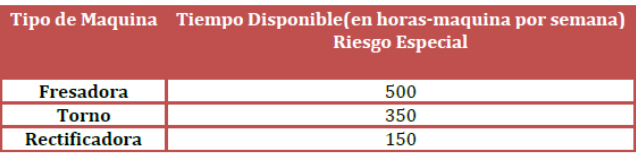

El número de horas-máquina requerido para cada unidad de los productos respectivos es:

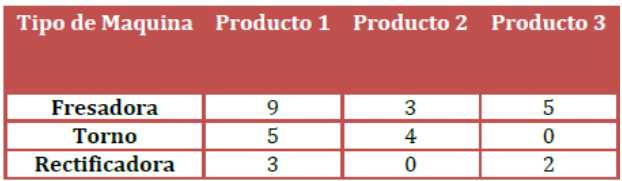

La ganancia unitaria respectiva seria de $50, $20 y $25 para los productos 1, 2 y 3. El objetivo es determinar cuántos productos de cada tipo debe producir la compañía para maximizar la ganancia.

Objetivo: Maximizar la ganancia

Solución:

Con la información proporcionada en el problema, se puede describir la expresión de la función objetivo, así como las restricciones.

$x_1$ = producto 1

$x_2$ = producto 2

$x_3$ = producto 3


Modelo matemático

Función objetivo:

Max $50x_1$ + $20x_2$ + $25x_3$

$s.a$

$9x_1$ + $3x_2$ + $5x_3$  $<=$ 500   --- horas máquina fresadora

$5x_1$ + $4x_2$  $<=$ 350 --- horas máquina torno

$3x_1$ + $2x_3$  $<=$ 150   --- horas máquina rectificadora





In [ ]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Variables de decisión
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)
model.x3 = Var(within=NonNegativeReals)

# Función objetivo
model.obj = Objective(expr=50*model.x1 + 20*model.x2 + 25*model.x3, sense=maximize)

# Restricciones
model.restr1 = Constraint(expr=9*model.x1 + 3*model.x2 + 5*model.x3 <= 500)  # Horas máquina fresadora
model.restr2 = Constraint(expr=5*model.x1 + 4*model.x2 <= 350)  # Horas máquina torno
model.restr3 = Constraint(expr=3*model.x1 + 2*model.x3 <= 150)  # Horas máquina rectificadora

# Resolver el modelo
solver = SolverFactory('glpk')  # Asegúrate de tener GLPK instalado
solver.solve(model)

# Mostrar resultados
print(f"x1 = {model.x1.value}")
print(f"x2 = {model.x2.value}")
print(f"x3 = {model.x3.value}")
print(f"Valor óptimo: {model.obj()}")


x1 = 0.0
x2 = 87.5
x3 = 47.5
Valor óptimo: 2937.5


**Problema 6**

¡Hoy es su día de suerte! Acaba de ganarse un premio de $10,000. Dedicará $4,000 a impuestos y diversiones, pero ha decidido invertir los otros $6,000. Al oír las nuevas, dos amigos le han ofrecido una oportunidad de convertirse en socio en dos empresas distintas, cada una planeada por uno de ellos; en ambos casos, la inversión incluye dedicar parte de su tiempo el siguiente verano y dinero en efectivo. Para ser un socio al 100% del primer amigo debe invertir $5,000 y 400 horas, y su ganancia estimada (sin tomar en cuenta el valor del dinero en el tiempo) sería $4,500. Las cifras correspondientes para el segundo caso son $4000 y 500 horas con una ganancia estimada de $4,500; sin embargo, ambos amigos son flexibles y le permitirán participar con cualquier fracción de participación que quiera. Si elige una participación parcial, todas las cifras dadas para la sociedad completa (inversión de dinero y tiempo, y la ganancia) se puede multiplicar por esa fracción. Como de todas formas usted busca en trabajo de verano interesante (máximo 600 horas), ha decidido participar en una o ambas empresas en alguna combinación que maximice su ganancia total estimada. Usted debe resolver el problema de encontrar la mejor combinación.

In [ ]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Definir variables de decisión
model.x1 = Var(bounds=(0,1))  # Porcentaje de inversión en la empresa 1
model.x2 = Var(bounds=(0,1))  # Porcentaje de inversión en la empresa 2

# Función objetivo: Maximizar la ganancia total
model.objective = Objective(expr=4500 * model.x1 + 4500 * model.x2, sense=maximize)

# Restricciones de inversión y tiempo
model.money = Constraint(expr=5000 * model.x1 + 4000 * model.x2 <= 6000)  # Restricción de dinero disponible
model.time = Constraint(expr=400 * model.x1 + 500 * model.x2 <= 600)  # Restricción de tiempo disponible

# Resolver el problema
solver = SolverFactory('glpk')
solver.solve(model)

# Mostrar resultados
print(f"Valor óptimo: {model.objective()}")
print(f"Porcentaje óptimo de inversión en la empresa 1: {model.x1.value * 100:.2f}%")
print(f"Porcentaje óptimo de inversión en la empresa 2: {model.x2.value * 100:.2f}%")


Valor óptimo: 5999.999999999998
Porcentaje óptimo de inversión en la empresa 1: 66.67%
Porcentaje óptimo de inversión en la empresa 2: 66.67%


**Problema 7**

Carne con papas es el plato favorito de Ralph Edmund. Por eso decidió hacer una dieta continua de solo estos dos alimentos (más algunos líquidos y suplementos de vitaminas) en todas sus comidas. Ralph sabe que no es la dieta más sana y quiere asegurarse de que toma las cantidades adecuadas de los dos alimentos para satisfacer los requerimientos nutricionales. Cuenta con la siguiente información nutricional y de costo:

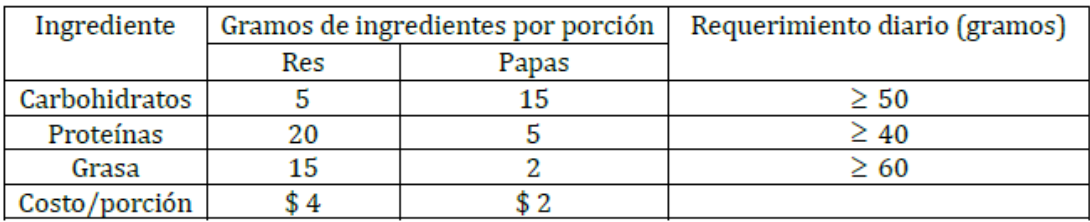

Ralph quiere determinar el número de porciones diarias (pueden ser fraccionales) de res y papas que cumplirían con estos requerimientos a un costo mínimo.

Modelo matemático

$x_1$ = res

$x_2$ = papas

Función objetivo:

Min $4x_1$ + $2x_2$

$s.a$

$5x_1$ + $15x_2$ $>=$ 50  --- carbohidratos

$20x_1$ + $5x_2$  $>=$ 40 --- proteinas

$15x_1$ + $2x_2$  $>=$ 60  --- grasa

In [ ]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Variables de decisión
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

# Función objetivo
model.obj = Objective(expr=4*model.x1 + 2*model.x2, sense=minimize)

# Restricciones
model.restr1 = Constraint(expr=5*model.x1 + 15*model.x2 >= 50)  # Carbohidratos
model.restr2 = Constraint(expr=20*model.x1 + 5*model.x2 >= 40)  # Proteínas
model.restr3 = Constraint(expr=15*model.x1 + 2*model.x2 >= 60)  # Grasa

# Resolver el modelo
solver = SolverFactory('glpk')  # Asegúrate de tener GLPK instalado
solver.solve(model)

# Mostrar resultados
print(f"x1 = {model.x1.value}")
print(f"x2 = {model.x2.value}")
print(f"Valor óptimo: {model.obj()}")


x1 = 3.72093023255814
x2 = 2.09302325581395
Valor óptimo: 19.06976744186046


**Problema 8**

Dwight es un maestro de primaria que también cría puercos para tener ingresos adicionales.
Intenta decidir que alimento darles. Piensa que debe usar una combinación de los alimentos
que venden los proveedores locales. Dwight desea que tenga un costo mínimo al mismo tiempo
que cada puerco reciba una cantidad adecuada de calorías y vitaminas. El costo y los contenidos
de cada alimento se muestran en la tabla. Cada puerco requiere al menos 8,000 calorías por día
y 700 unidades de vitaminas.


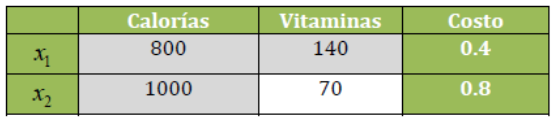

Modelo matemático

$x_1$ = Alimento Tipo 1

$x_2$ = Alimento Tipo 2

Función objetivo:

Min $0.4x_1$ + $0.8x_2$

$s.a$

$800x_1$ + $1000x_2$ $>=$ 8000  --- carbohidratos

$140x_1$ + $70x_2$  $>=$ 700 --- proteinas


In [3]:
from pyomo.environ import *

# Crear el modelo
model = ConcreteModel()

# Variables de decisión
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

# Función objetivo
model.obj = Objective(expr=0.4*model.x1 + 0.8*model.x2, sense=minimize)

# Restricciones
model.restr1 = Constraint(expr=800*model.x1 + 1000*model.x2 >= 8000)  # Carbohidratos
model.restr2 = Constraint(expr=140*model.x1 + 70*model.x2 >= 700)  # Proteínas

# Resolver el modelo
solver = SolverFactory('glpk')  # Asegúrate de tener GLPK instalado
solver.solve(model)

# Mostrar resultados
print(f"x1 = {model.x1.value}")
print(f"x2 = {model.x2.value}")
print(f"Valor óptimo: {model.obj()}")


ModuleNotFoundError: No module named 'pyomo'

**Problema 9**

La Medequip Company produce equipos de precisión de diagnóstico médico en dos fábricas. Se
han recibido pedidos de tres centros médicos para la producción de este mes. La tabla muestra
el costo unitario de envío desde cada fábrica a cada centro. Además, muestra el número de
unidades que se producirán en cada fábrica y el número de unidades ordenadas por cada
cliente.

Ahora debe tomar la decisión sobre el plan de cuantas unidades enviar de cada fábrica a cada
cliente.

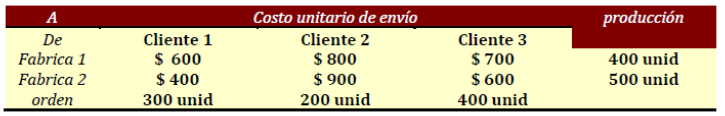

**Problema 10**

Fagesta Stellworks explora dos minas para obtener mineral de hierro, este mineral de hierro se envía a una de dos instalaciones de almacenamiento. Cuando se necesita se manda a la planta de acero de la compañía. El siguiente diagrama describe la red de distribución, donde M1 y M2 son las dos minas, S1 y S2, los dos almacenes, y P es la planta de acero. También muestra las cantidades producidas en las minas y las necesarias en la planta; asimismo, el costo de envió y la cantidad máxima que se puede enviar al mes por cada vía. La administración desea determinar el plan más económico de envío del mineral de las minas a la planta.

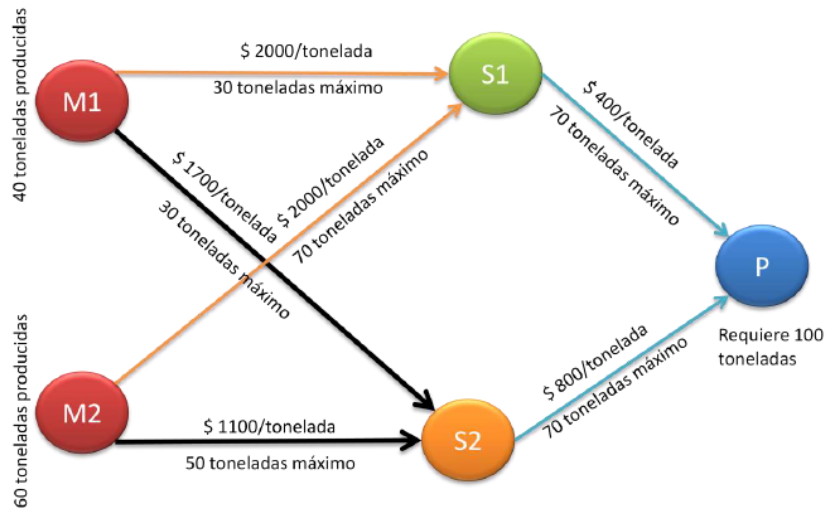